In [1]:
"""1. 导包"""
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import*
from sklearn.linear_model import LogisticRegression
from  sklearn import svm
from  sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm  import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier


"""2. 读取数据"""
dataset = pd.read_csv('./data.csv',encoding='gbk')

"""2. 读取数据"""
dataset = pd.read_csv('./data.csv',encoding='gbk')

"""3. 数据处理"""
# 删除固定信息列
dataset = dataset.drop(["custid","trade_no","bank_card_no","id_name","first_transaction_time","latest_query_time","loans_latest_time","source"],axis=1)
# 对于sstudent_feature列，我们进行NAN转成0,2转为0
# 缺失值填充
dataset["student_feature"] = dataset["student_feature"].fillna(0)
# 2替换为0
dataset["student_feature"] = dataset["student_feature"].replace([2],[0])

# 针对城市列'reg_preference_for_trad'，进行数据替换
dataset["reg_preference_for_trad"] = dataset["reg_preference_for_trad"].replace("一线城市", "1")
dataset["reg_preference_for_trad"] = dataset["reg_preference_for_trad"].replace("二线城市", "2")
dataset["reg_preference_for_trad"] = dataset["reg_preference_for_trad"].replace("三线城市", "3")
dataset["reg_preference_for_trad"] = dataset["reg_preference_for_trad"].replace("其他城市", "4")
dataset["reg_preference_for_trad"] = dataset["reg_preference_for_trad"].replace("境外", "0")

In [2]:
dataset = dataset.fillna(0) # 使用 0 替换所有 NaN 的值
col = dataset.columns.tolist()[1:]

def missing(df, columns):
    """
    使用众数填充缺失值
    df[i].mode()[0] 获取众数第一个值
    """
    col = columns
    for i in col:
        df[i].fillna(df[i].mode()[0], inplace=True)
        df[i] = df[i].astype('float')


missing(dataset, col)

# 将object类型转成folat
dataset = dataset.convert_objects(convert_numeric=True)

"""4. 数据划分"""
X = dataset.drop(["status"],axis=1)
Y = dataset["status"]

C:\Users\hotheat\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [3]:
# 数据按正常的2、8划分
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=666)
# not enough values to unpack (expected 4, got 2)

from sklearn.preprocessing import minmax_scale # minmax_scale归一化，缩放到0-1
X_train = minmax_scale(X_train)
X_test =  minmax_scale(X_test)
# Input contains NaN, infinity or a value too large for dtype('float64').

"""5. 数据归一化"""
from sklearn.preprocessing import minmax_scale
# 归一化，缩放到0-1
X_train = minmax_scale(X_train)
X_test =  minmax_scale(X_test)

"""6. 模型整合及预测"""
# log_reg
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# SVM
LinearSVC = svm.SVC(kernel='linear', probability=True).fit(X_train, y_train)
# decision tree
dtree = DecisionTreeClassifier(max_depth=6)
dtree.fit(X_train, y_train)
# xgboost
xgbClassifier = XGBClassifier()
xgbClassifier.fit(X_train, y_train)
# lightgbm
lgbmClassifier = LGBMClassifier()
lgbmClassifier.fit(X_train, y_train)
# RandomForest
rgbClassifier = RandomForestClassifier()
rgbClassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

def model_metrics(clf, X_train, X_test, y_train, y_test):
    print(clf.__class__.__name__)
    # 预测
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    y_train_proba = clf.predict_proba(X_train)[:, 1]
    y_test_proba = clf.predict_proba(X_test)[:, 1]

    # 准确率
    print('[准确率]', end=' ')
    print('训练集：', '%.4f' % accuracy_score(y_train, y_train_pred), end=' ')
    print('测试集：', '%.4f' % accuracy_score(y_test, y_test_pred))

    # 精准率
    print('[精准率]', end=' ')
    print('训练集：', '%.4f' % precision_score(y_train, y_train_pred), end=' ')
    print('测试集：', '%.4f' % precision_score(y_test, y_test_pred))

    # 召回率
    print('[召回率]', end=' ')
    print('训练集：', '%.4f' % recall_score(y_train, y_train_pred), end=' ')
    print('测试集：', '%.4f' % recall_score(y_test, y_test_pred))

    # f1-score
    print('[f1-score]', end=' ')
    print('训练集：', '%.4f' % f1_score(y_train, y_train_pred), end=' ')
    print('测试集：', '%.4f' % f1_score(y_test, y_test_pred))
    # auc取值：用roc_auc_score或auc
    print('[auc值]', end=' ')
    print('训练集：', '%.4f' % roc_auc_score(y_train, y_train_proba), end=' ')
    print('测试集：', '%.4f' % roc_auc_score(y_test, y_test_proba))

    # roc曲线
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label=1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label=1)

    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)),
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train, tpr_train)
    plt.plot(fpr_test, tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc=4)
    plt.title("ROC curve")
    plt.show()

LogisticRegression
[准确率] 训练集： 0.8002 测试集： 0.7771
[精准率] 训练集： 0.7284 测试集： 0.7733
[召回率] 训练集： 0.3053 测试集： 0.2292
[f1-score] 训练集： 0.4303 测试集： 0.3537
[auc值] 训练集： 0.8049 测试集： 0.7692


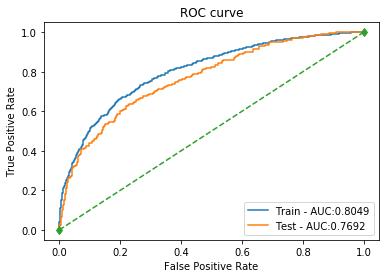

DecisionTreeClassifier
[准确率] 训练集： 0.8222 测试集： 0.7718
[精准率] 训练集： 0.8113 测试集： 0.7432
[召回率] 训练集： 0.3660 测试集： 0.2174
[f1-score] 训练集： 0.5044 测试集： 0.3364
[auc值] 训练集： 0.8356 测试集： 0.7166


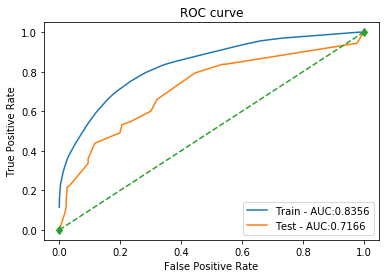

SVC
[准确率] 训练集： 0.7933 测试集： 0.7666
[精准率] 训练集： 0.8182 测试集： 0.8039
[召回率] 训练集： 0.2106 测试集： 0.1621
[f1-score] 训练集： 0.3350 测试集： 0.2697
[auc值] 训练集： 0.8089 测试集： 0.7780


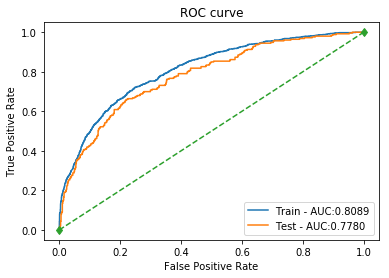

XGBClassifier
[准确率] 训练集： 0.8491 测试集： 0.7676
[精准率] 训练集： 0.8560 测试集： 0.8077
[召回率] 训练集： 0.4681 测试集： 0.1660
[f1-score] 训练集： 0.6052 测试集： 0.2754
[auc值] 训练集： 0.8981 测试集： 0.7387


C:\Users\hotheat\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\hotheat\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


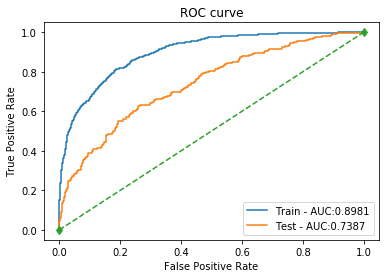

LGBMClassifier


C:\Users\hotheat\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[准确率] 训练集： 0.9892 测试集： 0.7560
[精准率] 训练集： 0.9989 测试集： 0.7442
[召回率] 训练集： 0.9574 测试集： 0.1265
[f1-score] 训练集： 0.9777 测试集： 0.2162
[auc值] 训练集： 0.9998 测试集： 0.6999


C:\Users\hotheat\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


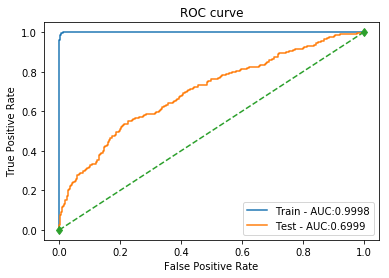

RandomForestClassifier
[准确率] 训练集： 0.9800 测试集： 0.7466
[精准率] 训练集： 0.9977 测试集： 0.5566
[召回率] 训练集： 0.9213 测试集： 0.2332
[f1-score] 训练集： 0.9580 测试集： 0.3287
[auc值] 训练集： 0.9995 测试集： 0.6713


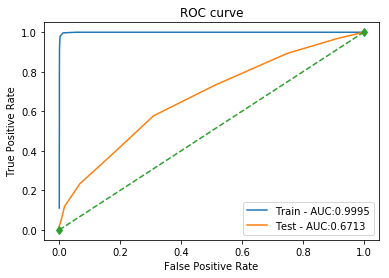

In [5]:
model_metrics(log_reg, X_train, X_test, y_train, y_test)

model_metrics(dtree, X_train, X_test, y_train, y_test)

model_metrics(LinearSVC, X_train, X_test, y_train, y_test)

model_metrics(xgbClassifier, X_train, X_test, y_train, y_test)

model_metrics(lgbmClassifier, X_train, X_test, y_train, y_test)

model_metrics(rgbClassifier, X_train, X_test, y_train, y_test)